In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [2]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
170,74.0,155.0,1.0,horse
109,84.0,172.0,1.0,horse
169,64.0,128.0,1.0,horse


In [3]:
#select needed columns 
df_dh_new = df_dh[['height', 'weight']] 

# Scale Data
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
df_dh_scaled = scaler.fit_transform(df_dh_new)

C:\Users\SarOonh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


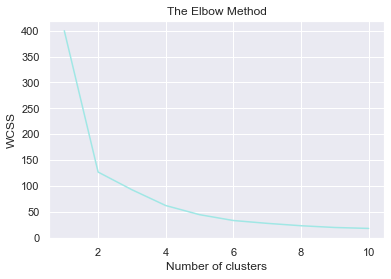

In [4]:
# Create Elbow Plot
X = df_dh_scaled.copy()

elbow_dh = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow_dh.append(kmeans.inertia_)
    
sns.set_theme(style="darkgrid") # set a theme
    
plt.plot(range(1, 11), elbow_dh, c = '#A0E7E5')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


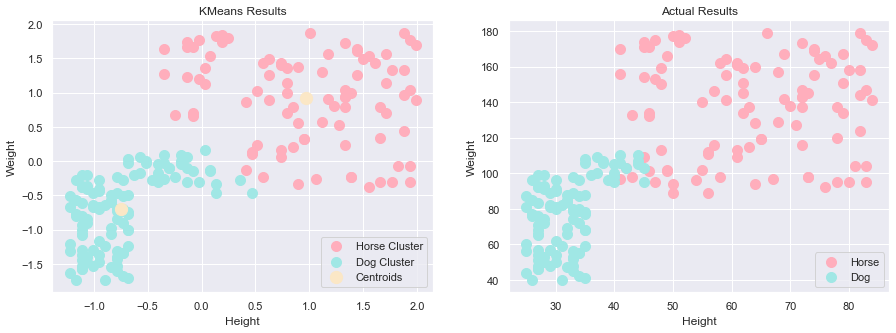

In [5]:
# Apply KMeans and Plot KMeans Results and Actual Results

#KMeans Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X)


plt.figure(figsize=(15,5)) # figure size 
sns.set_theme(style="darkgrid") # set a theme
# Making a subplot 
plt.subplot(1,2,1)



plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = '#FFAEBC', label = 'Horse Cluster')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = '#A0E7E5', label = 'Dog Cluster')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = '#FBE7C6', label = 'Centroids')
plt.title('KMeans Results')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc ='lower right')

# Actual Results
plt.subplot(1,2,2)

plt.scatter(df_dh.loc[(df_dh['type'] == "horse"), 'height'],df_dh.loc[(df_dh['type'] == "horse"), 'weight'], s = 100, c = '#FFAEBC', label = 'Horse')
plt.scatter(df_dh.loc[(df_dh['type'] == "dog"), 'height'],df_dh.loc[(df_dh['type'] == "dog"), 'weight'], s = 100, c = '#A0E7E5', label = 'Dog')

plt.title('Actual Results')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc ='lower right')



In [6]:
# Compute Accuracy Score of KMean Labels with True Labels
#rename dog as 1 and horse as 0 
df_dh = df_dh.replace(to_replace ="dog",value =1)
df_dh = df_dh.replace(to_replace ="horse",value =0)

# Accuracy Score
print("Accuracy: ",round(accuracy_score(df_dh['type'], y_kmeans),2))

Accuracy:  0.94


#### Seattle Weather KMeans Challenge

In [7]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")

#drop null values 
df_sea = df_sea.dropna()
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
21122,2005-10-30,0.31,57,43,True
8195,1970-06-09,0.16,60,47,True
5887,1964-02-13,0.00,47,37,False


In [8]:
# Scale Data
#select needed columns 
df_sea_new = df_sea[['prcp', 'tmax']] 

# Scale Data
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
df_sea_scaled = scaler.fit_transform(df_sea_new)

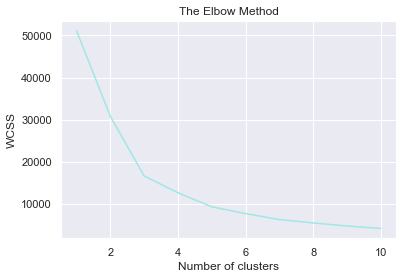

In [9]:
# Create Elbow Plot

X = df_sea_scaled.copy()

elbow_sea = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow_sea.append(kmeans.inertia_)
    
plt.plot(range(1, 11), elbow_sea, c = '#A0E7E5')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



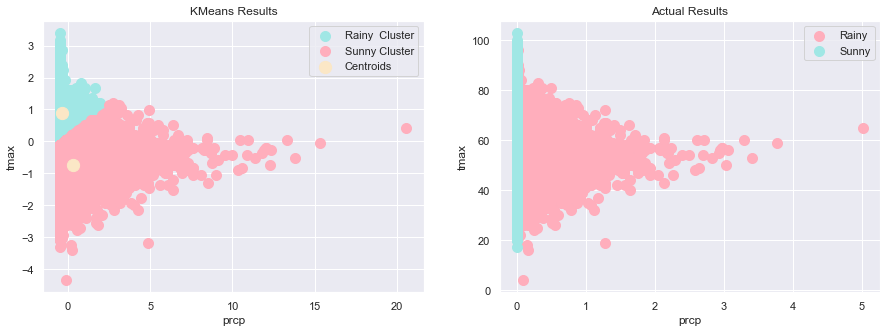

In [10]:
# Apply KMeans and Plot KMeans Results and Actual Results


#KMeans Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X)


plt.figure(figsize=(15,5)) # figure size 
sns.set_theme(style="darkgrid") # set a theme
# Making a subplot 
plt.subplot(1,2,1)



plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = '#A0E7E5', label = 'Rainy  Cluster')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = '#FFAEBC', label = 'Sunny Cluster')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = '#FBE7C6', label = 'Centroids')
plt.title('KMeans Results')
plt.xlabel('prcp')
plt.ylabel('tmax')
plt.legend(loc ='upper right')


# Actual Results
plt.subplot(1,2,2)

plt.scatter(df_sea.loc[(df_sea['rain'] == True), 'prcp'],df_sea.loc[(df_sea['rain'] == True), 'tmax'], s = 100, c = '#FFAEBC', label = 'Rainy')
plt.scatter(df_sea.loc[(df_sea['rain'] == False), 'prcp'],df_sea.loc[(df_sea['rain'] == False), 'tmax'], s = 100, c = '#A0E7E5', label = 'Sunny')

plt.title('Actual Results')
plt.xlabel('prcp')
plt.ylabel('tmax')
plt.legend(loc ='upper right')




In [11]:
# Compute Accuracy Score of KMean Labels with True Labels
#rename rain as 1 and sunny as 0 
df_sea['rain'] = df_sea['rain'].replace(True, 0)
df_sea['rain'] = df_sea['rain'].replace(False, 1)

# Accuracy Score
print("Accuracy: ",round(accuracy_score(df_sea['rain'], y_kmeans),2))


Accuracy:  0.54


#### Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


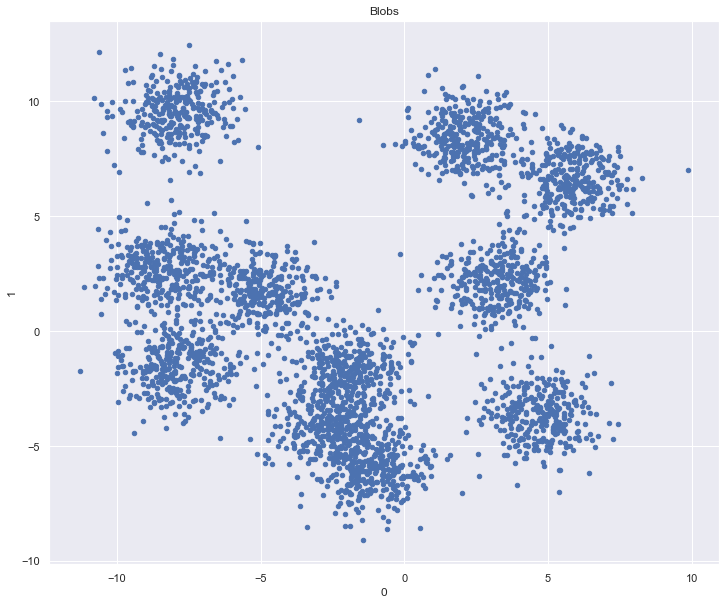

In [12]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000),centers=random.randint(10,30))[0]  )
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [13]:
# Scale Data
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply
df_blob_scaled = scaler.fit_transform(df_blob)

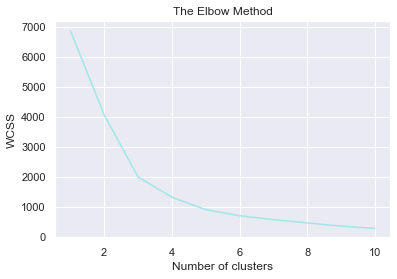

In [14]:
# Create Elbow Plot

X = df_blob_scaled.copy()

elbow_blob = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow_blob.append(kmeans.inertia_)
    
plt.plot(range(1, 11), elbow_blob, c = '#A0E7E5')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

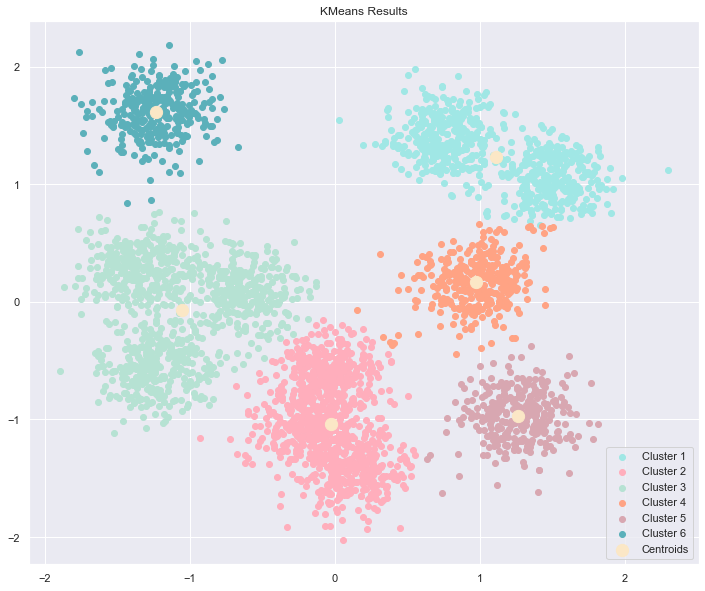

In [15]:
# Apply KMeans and Plot KMeans Results
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X)


plt.figure(figsize=(12,10))# figure size 
sns.set_theme(style="darkgrid") # set a theme

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = '#A0E7E5', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = '#FFAEBC', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = '#B6E2D3', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = '#FFA384', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = '#D8A7B1', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], c = '#5BB0BA', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = '#FBE7C6', label = 'Centroids')
plt.title('KMeans Results')
plt.legend(loc ='lower right')
